In [42]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
import richdem as rd


In [38]:
font = {'family': 'ubuntu', 'weight': 'normal', 'size': 11}  # Modify family and size as needed
plt.rc('font', **font)

In [18]:
img = rio.open('../srtm_region/barbacena_elevacao.tif').read(); 
img = img.astype(float)

In [19]:
print(img.shape)   # return (1, 217, 317)
img[img == 0] = np.nan


(1, 217, 317)


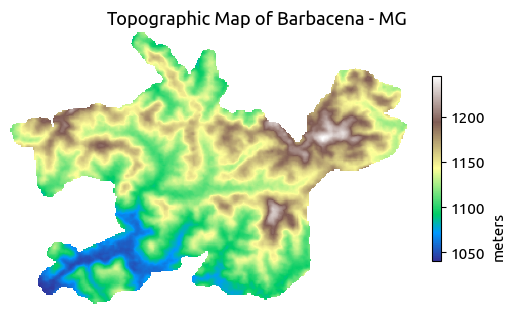

In [76]:
plt.imshow(img[0], cmap = 'terrain')
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('meters', loc = 'bottom')
plt.title("Topographic Map of Barbacena - MG", loc='right')
plt.axis('off')
plt.savefig("imgs/topografia_bq.png")
plt.show()


In [50]:
dem = rd.rdarray(img[0], no_data=-9999)

In [52]:
slope = rd.TerrainAttribute(dem, attrib='slope_riserun')
#rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
#plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (rise/run)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.00605184===================== ] (99% - 0.0s - 1 threads)


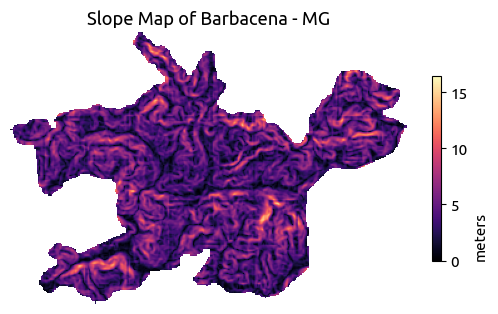

In [78]:
plt.imshow(slope, cmap = 'magma')
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('meters', loc = 'bottom')
plt.title("Slope Map of Barbacena - MG", loc='center')
plt.axis('off')
#plt.savefig("imgs/slope_bq.png")
plt.show()


In [81]:
# Write to TIFF
kwargs = metadados.meta
kwargs.update(
    dtype=rio.float32,
    count=1,
    #compress='lzw'
    )

with rio.open('slope.tiff', 'w', **kwargs) as dst:
    dst.write_band(1, slope.astype(rio.float32))